# * Kurapati Venkatesh

# * 05062021

# * Topic: Deep Learning Challenges  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

##  The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes using a simple ANN model

## -----------------------------------------------------------------------------------

### Problem Objective:
### The main objective of data set is to predict whether a patient has diabetes using a simple ANN model

### Dataset Description:

The datasets consists 8 independent variables and one Dependent variable.

### Independent variables includes:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

### Dependent variable:

Outcome: 1 as diabites detected & 0 as not detetcted

## -------------------------------------------------------------------------------------------

## import libraries:

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns

## import dataset:

In [23]:
db = pd.read_csv(r"G:\360digit\AI&DL\Assignments\5. Deep learning Challenges\diabetes.csv")

In [24]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA:

In [25]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
db.shape

(768, 9)

In [28]:
db["Outcome"].value_counts().to_frame()

,Outcome
0,500
1,268


Let's see, whether there are any relationships b/w outcome and independent variables

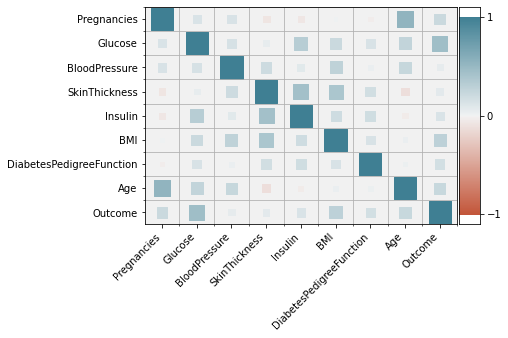

In [50]:
from heatmap import heatmap, corrplot
corrplot(db.corr(), size_scale=500, marker='s')

from the above plot, we can infer that, there is no significant correlation between outcome and other variables, except for glucose.

we will choose dependent variable y and independent variables X. After choosing X and y we will scale the data and split them into training and testing sets respectively. Also, we will do one-hot encoding to our target variable y.

### Choosing X and y:

In [29]:
X = db.drop('Outcome',axis = 1)
y = db['Outcome']

### Scaling the data;

In [30]:
from sklearn.preprocessing import scale
X = scale(X)

In [31]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Train/Test Split:

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
X_train

array([[-0.84488505, -0.81042491, -0.47073225, ..., -1.02710391,
        -0.63989158, -0.95646168],
       [ 0.3429808 , -0.49745345,  0.14964075, ...,  0.62284628,
        -0.94492356, -0.44593516],
       [-1.14185152,  0.44146091, -0.05715025, ...,  1.30821021,
        -0.32277912, -0.78628618],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

### One hot encoding:

In [34]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [35]:
y_train.shape

(537, 2)

## Modelling:

* we will move towards designing and building the neural network model using keras. 

* Here we are using one input layer with 12 neurons, one hidden layer with 8 neurons and one output layer with 2 neurons.

* Hidden Layer is nothing but simple layer which takes the input layer output as input an pass it on to next layer. 

* Here we are using two activation functions relu and sigmoid. Sigmoid takes all negative values and maps them to zero and relu is also similar activation function which can be defined as y = max(0, x).

In [36]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))

Now we will compile our model and assign optimization method which will perform backpropagation for us. Backpropagation is nothing but it updates weights to optimize our loss function. Here we are using adam optimizer to perform backpropagation. Also, we are using binary cross-entropy as our loss function and accuracy metrics. Accuracy metrics is just the difference between actual values and predicted values. 

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now finally we will train our model. Here we are using 150 epochs.

### Training the Model:

In [38]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=10)

Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.4637
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5996
Epoch 3/100
54/54 [==============================] - 0s 991us/step - loss: 0.6332 - accuracy: 0.6946
Epoch 4/100
54/54 [==============================] - 0s 907us/step - loss: 0.5930 - accuracy: 0.7356
Epoch 5/100
54/54 [==============================] - 0s 852us/step - loss: 0.5555 - accuracy: 0.7412
Epoch 6/100
54/54 [==============================] - 0s 833us/step - loss: 0.5249 - accuracy: 0.7449
Epoch 7/100
54/54 [==============================] - 0s 833us/step - loss: 0.5050 - accuracy: 0.7467
Epoch 8/100
54/54 [==============================] - 0s 852us/step - loss: 0.4878 - accuracy: 0.7561
Epoch 9/100
54/54 [==============================] - 0s 871us/step - loss: 0.4774 - accuracy: 0.7654
Epoch 10/100
54/54 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.

54/54 [==============================] - 0s 907us/step - loss: 0.3811 - accuracy: 0.8287
Epoch 82/100
54/54 [==============================] - 0s 907us/step - loss: 0.3811 - accuracy: 0.8324
Epoch 83/100
54/54 [==============================] - 0s 870us/step - loss: 0.3803 - accuracy: 0.8268
Epoch 84/100
54/54 [==============================] - 0s 833us/step - loss: 0.3806 - accuracy: 0.8305
Epoch 85/100
54/54 [==============================] - 0s 870us/step - loss: 0.3789 - accuracy: 0.8305
Epoch 86/100
54/54 [==============================] - 0s 870us/step - loss: 0.3777 - accuracy: 0.8287
Epoch 87/100
54/54 [==============================] - 0s 796us/step - loss: 0.3768 - accuracy: 0.8361
Epoch 88/100
54/54 [==============================] - 0s 722us/step - loss: 0.3775 - accuracy: 0.8305
Epoch 89/100
54/54 [==============================] - 0s 759us/step - loss: 0.3757 - accuracy: 0.8287
Epoch 90/100
54/54 [==============================] - 0s 778us/step - loss: 0.3753 - accuracy: 

* After training model, we will predict and evaluate our model using the accuracy score. 

* Also, we will plot out loss function to see if the model is converged correctly or not. If the graph gets more elbow shaped that means model have achieved maximum accuracy and it does not need more training.

### Prediction:

In [39]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.7272727272727273

### Evaluation:

    * Plotting Loss against  no of epochs

Text(0, 0.5, 'Loss')

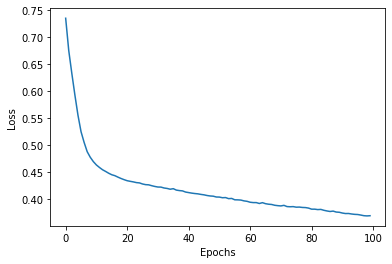

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121  30]
 [ 33  47]]


In [53]:
print(accuracy)

NameError: name 'accuracy' is not defined